## **Лабораторна робота 2**

In [6]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [7]:
def generate_data(sample_size):
    """
    Генерує sample_size незалежних нормально розподілених випадкових величин.
    Імовірності станів: p0=0.1, p1=0.2, p2=0.3, p3=0.4
    Середні значення для станів: state_means[k] = k для k=0,1,2,3
    Дисперсія = 1
    """
    state_probabilities = np.array([0.1, 0.2, 0.3, 0.4])  # ймовірності станів
    state_means = np.array([0.0, 1.0, 2.0, 3.0])  # середні значення станів
    sampled_states = np.random.choice([0, 1, 2, 3], size=sample_size, p=state_probabilities)
    generated_data = np.random.normal(loc=state_means[sampled_states], scale=1.0, size=sample_size)
    return generated_data, state_probabilities, state_means


In [8]:
def em_algorithm(observations, tolerance=0.001, max_iterations=1000, verbose=True):
    """
    EM-алгоритм для суміші 4-х нормальних розподілів з відомою дисперсією 1.

    Параметри:
    observations : масив спостережень
    tolerance : допуск для зупинки
    max_iterations : максимальна кількість ітерацій
    verbose : виводити інформацію про ітерації

    Повертає:
    component_probabilities : оцінки ймовірностей компонент
    component_means : оцінки середніх значень компонент
    """

    num_samples = len(observations)
    num_components = 4  # Кількість компонент

    # Початкові оцінки
    component_probabilities = np.full(num_components, 1.0 / num_components)  # Рівні ймовірності
    component_means = np.linspace(0, 3, num_components)  # Початкові середні

    for iteration in range(max_iterations):
        # E-крок
        likelihood_matrix = np.zeros((num_samples, num_components))  # Ймовірності для кожного компонента
        for k in range(num_components):
            likelihood_matrix[:, k] = (
                component_probabilities[k] * norm.pdf(observations, loc=component_means[k], scale=1.0)
            )
        weights = likelihood_matrix / likelihood_matrix.sum(axis=1, keepdims=True)  # Ваги для кожної точки

        # M-крок
        updated_probabilities = weights.sum(axis=0) / num_samples  # Оновлені ймовірності компонент
        updated_means = (weights * observations[:, np.newaxis]).sum(axis=0) / weights.sum(axis=0)  # Оновлені середні

        # Перевірка на збіжність
        max_diff = np.max(np.abs(np.concatenate([updated_probabilities - component_probabilities, 
                                                 updated_means - component_means])))
        component_probabilities, component_means = updated_probabilities, updated_means

        if verbose:
            print(f"Ітерація {iteration + 1}: p={component_probabilities}, a={component_means}, diff={max_diff}")

        if max_diff < tolerance:
            if verbose:
                print("Алгоритм збігся.")
            break

    return component_probabilities, component_means


In [9]:
def plot_results(observations, component_probabilities, component_means):
    """
    Візуалізує результати EM-алгоритму для суміші нормальних розподілів.

    Параметри:
    observations : масив спостережень
    component_probabilities : оцінені ймовірності компонент
    component_means : оцінені середні значення компонент
    """
    plt.figure(figsize=(10, 6))

    # Побудова гістограми даних
    counts, bins, _ = plt.hist(
        observations, bins=30, density=True, alpha=0.5, color='gray', edgecolor='black', label='Дані'
    )
    x_values = np.linspace(min(observations) - 1, max(observations) + 1, 200)
    estimated_mixture_pdf = np.zeros_like(x_values)

    # Побудова кожної компоненти
    for component_index in range(len(component_probabilities)):
        component_pdf = component_probabilities[component_index] * norm.pdf(
            x_values, loc=component_means[component_index], scale=1.0
        )
        estimated_mixture_pdf += component_pdf
        plt.plot(
            x_values, component_pdf, linestyle='--',
            label=f'Компонента {component_index}, μ={component_means[component_index]:.2f}, '
                  f'p={component_probabilities[component_index]:.2f}'
        )

    # Побудова загальної суміші
    plt.plot(x_values, estimated_mixture_pdf, 'r-', linewidth=2, label='Суміш')
    plt.title('Оцінена суміш нормальних розподілів')
    plt.xlabel('x')
    plt.ylabel('Густина ймовірності')
    plt.legend()
    plt.grid(True)
    plt.show()



Розмір вибірки: 10
Оціночні ймовірності станів: [0.154 0.23  0.102 0.514]
Оціночні середні значення: [1.094 1.094 1.098 3.531]
Різниця за ймовірностями: [0.054 0.03  0.198 0.114]
Різниця за середніми: [1.094 0.094 0.902 0.531]

Розмір вибірки: 100
Оціночні ймовірності станів: [0.262 0.094 0.351 0.293]
Оціночні середні значення: [0.459 2.301 2.341 2.999]
Різниця за ймовірностями: [0.162 0.106 0.051 0.107]
Різниця за середніми: [4.590e-01 1.301e+00 3.410e-01 1.000e-03]

Розмір вибірки: 1000
Оціночні ймовірності станів: [0.187 0.248 0.241 0.324]
Оціночні середні значення: [0.753 0.918 2.613 2.889]
Різниця за ймовірностями: [0.087 0.048 0.059 0.076]
Різниця за середніми: [0.753 0.082 0.613 0.111]

Розмір вибірки: 5000
Оціночні ймовірності станів: [0.158 0.208 0.281 0.352]
Оціночні середні значення: [0.214 1.287 2.314 3.067]
Різниця за ймовірностями: [0.058 0.008 0.019 0.048]
Різниця за середніми: [0.214 0.287 0.314 0.067]

Розмір вибірки: 10000
Оціночні ймовірності станів: [0.141 0.23  0.


Введіть розмір вибірки (n) для візуалізації:  500


Ітерація 1: p=[0.16236894 0.21835207 0.28714529 0.3321337 ], a=[0.2240879  1.32322305 2.20665326 3.10194548], diff=0.3232230494938273
Ітерація 2: p=[0.15731477 0.21707338 0.29414315 0.33146871], a=[0.1694778  1.3822765  2.20536529 3.05849155], diff=0.059053450333537594
Ітерація 3: p=[0.15401828 0.21623834 0.29857357 0.33116981], a=[0.1140839  1.42568811 2.20250513 3.03691588], diff=0.05539389958209298
Ітерація 4: p=[0.15130991 0.21613634 0.30190674 0.330647  ], a=[0.06897621 1.45928387 2.19656564 3.02499365], diff=0.045107690711063755
Ітерація 5: p=[0.14893455 0.21659154 0.30458701 0.3298869 ], a=[0.03404752 1.48540621 2.18828125 3.0188674 ], diff=0.03492869054955804
Ітерація 6: p=[0.14683147 0.21739034 0.30681481 0.32896339], a=[0.00701103 1.50583793 2.17858581 3.01674203], diff=0.02703648380021717
Ітерація 7: p=[0.14496753 0.21837636 0.3087168  0.32793931], a=[-0.0142947   1.52206167  2.16818726  3.01744326], diff=0.0213057366299038
Ітерація 8: p=[0.14330978 0.21945018 0.31038414 0.3

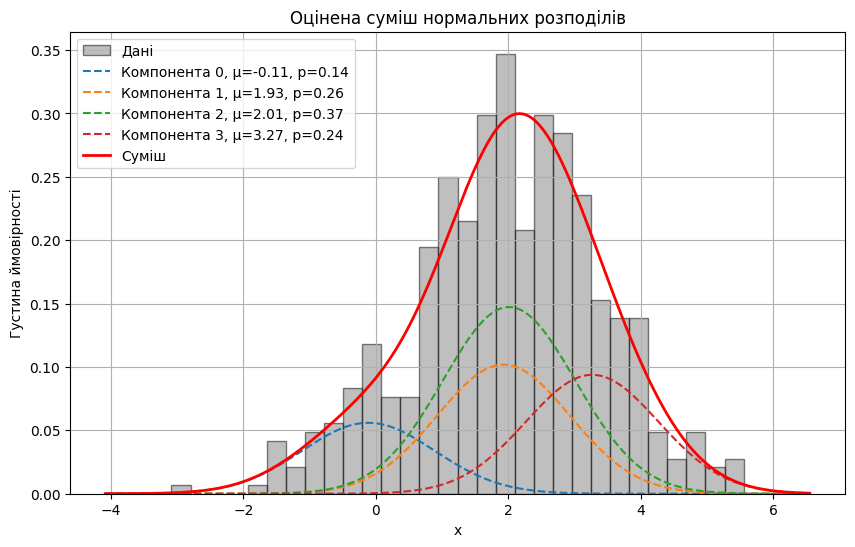

In [13]:
def main():
    """
    Основна функція для запуску EM-алгоритму на суміші нормальних розподілів
    з візуалізацією результатів та аналізом похибок для різних обсягів вибірок.
    """
    # Істинні параметри розподілів
    true_probabilities = np.array([0.1, 0.2, 0.3, 0.4])
    true_means = np.array([0.0, 1.0, 2.0, 3.0])

    # Масив розмірів вибірок для тестування
    sample_sizes = [10, 100, 1000, 5000, 10000]

    for sample_size in sample_sizes:
        print(f"\nРозмір вибірки: {sample_size}")

        # Генерація даних
        observations, true_probs, true_means = generate_data(sample_size)

        # Запуск EM-алгоритму
        estimated_probs, estimated_means = em_algorithm(observations, tolerance=0.001, max_iterations=1000, verbose=False)

        # Обчислення різниць між істинними та оціненими параметрами
        probabilities_diff = np.abs(true_probs - estimated_probs)
        means_diff = np.abs(true_means - estimated_means)

        # Виведення результатів
        print("Оціночні ймовірності станів:", estimated_probs.round(3))
        print("Оціночні середні значення:", estimated_means.round(3))
        print("Різниця за ймовірностями:", probabilities_diff.round(3))
        print("Різниця за середніми:", means_diff.round(3))

    # Запит на додатковий аналіз із вибіркою заданого користувачем розміру
    try:
        user_sample_size = int(input("\nВведіть розмір вибірки (n) для візуалізації: "))
        if user_sample_size <= 0:
            raise ValueError("Розмір вибірки має бути більше 0.")
    except ValueError as error:
        print("Помилка:", error)
        return

    # Генерація даних для вибірки заданого користувачем розміру
    observations, true_probs, true_means = generate_data(user_sample_size)

    # Запуск EM-алгоритму з детальним виведенням
    estimated_probs, estimated_means = em_algorithm(observations, tolerance=0.001, max_iterations=1000, verbose=True)

    # Обчислення різниць між істинними та оціненими параметрами
    probabilities_diff = np.abs(true_probs - estimated_probs)
    means_diff = np.abs(true_means - estimated_means)

    # Виведення результатів
    print("\nОціночні ймовірності станів:", estimated_probs.round(3))
    print("Оціночні середні значення:", estimated_means.round(3))
    print("Різниця за ймовірностями:", probabilities_diff.round(3))
    print("Різниця за середніми:", means_diff.round(3))

    # Візуалізація результатів для вибірки
    plot_results(observations, estimated_probs, estimated_means)

if __name__ == "__main__":
    main()


**Пояснення**

Відповідно до умови завдання, ймовірності перебування в станах задаються як p0 = 0.1, p1 = 0.2, p2 = 0.3, p3 = 0.4. Для кожної точки ми послідовно визначаємо стан на основі цих ймовірностей, після чого генеруємо нормальні величини з відповідними середніми значеннями та фіксованою дисперсією.

Далі реалізовано алгоритм самонавчання (EM-алгоритм), який оцінює ймовірності pk та середні значення a_k для кожної компоненти.

Важливо зазначити, що при малих розмірах вибірки n оцінки параметрів можуть бути нестійкими та значно відхилятися від істинних значень через високу варіативність даних. Натомість із збільшенням n оцінки стають більш точними, оскільки велика вибірка краще відображає істинний розподіл.

Для аналізу результатів розглянемо випадок із n = 500. Алгоритм EM продемонстрував досить стабільні оцінки. На графіку видно, що одна з компонент має найбільшу вагу та середнє, близьке до 3, тоді як інші компоненти розташовані ближче до менших значень. Це свідчить про природну варіативність даних: іноді певні компоненти можуть бути переоцінені або недооцінені через статистичні флуктуації вибірки. 

Проте загалом червона крива (оцінена суміш) добре узгоджується з гістограмою, підтверджуючи адекватність оцінених параметрів.


**Аналіз поведінки алгоритми (завдання 3)**:

Вплив розмірку вибірки n:
1. Коли розмір вибірки дуже малий (наприклад, n=10), результати сильно варіюються. Істинні параметри (ймовірності та середні значення компонент) майже напевно будуть оцінені з великими похибками. Причина – недостатня кількість даних для адекватного апроксимування справжнього розподілу.
2. Для середніх вибірок (n=100 або/та n=500) точність покращується, але все ще можуть спостерігатися помітні відхилення. Наприклад, при n=100 зміни стають менш хаотичними, але модель може все ще недостатньо точно відтворити істинні параметри. Відповідно кращі результати у порівнянні з малими вибірками, але похибки ще значні. При n=500 ми бачимо суттєве покращення результатів, але спостерігаємо явище, коли одна або дві компоненти все ще залишаються або недооціненими, або переоціненими (можемо побачити по графіку вище).
3. Великі вибірки (n = 1000, 5000, 10000) демонструють те, що параметри збігаються до істинних значень дедалі точніше. Коли n=1000 похибки помітно зменшуються, хоча іноді деякі компоненти все ще дещо зміщені. При n=5000, 10000 оцінки стають ближчими до істинних. Зменшується різниця як за ймовірностями, так і за середніми. Це підтверджує, що **EM-алгоритм є обґрунтованим статистично** – зі збільшенням розміру вибірки його оцінки збігаються до істинних параметрів.

Вплив початкових оцінок параметрів:
1. **Рівномірні початкові ймовірності і фіксовані середні**: якщо починати з однакових ймовірностей для всіх компонент (наприклад, по 0.25) та середніх, що не відображають реальний розподіл (наприклад, [0,1,2,3]), алгоритм все одно врешті-решт збіжиться. Однак алгоритму може знадобитися більше ітерацій до збіжності. При цьому є ризик застрягти в локальному максимумі чи отримати зсув у параметрах, якщо вибірка мала або невдало розподілена.
2. **Адаптивна ініціалізація**: використання початкових середніх, вибраних відповідно до статистики даних (наприклад, розташування між мінімумом і максимумом вибірки) або застосування простих кластеризаційних методів (наприклад, k-means для знаходження центрів) може прискорити збіжність і зменшити похибки. Це особливо помітно на малих вибірках, де поганий старт може сильно вплинути на результати.

**Висновки**:
1. На малих вибірках випадковий шум має великий вплив. Алгоритм підлаштовується під обмежений набір спостережень, що призводить до нестабільних оцінок.
2. При збільшенні n точність зростає. Алгоритм має змогу краще "розрізнити" компоненти суміші, оскільки вибірка стає більш репрезентативною.
3. Початкові оцінки впливають на швидкість і якість збіжності. Кращі початкові оцінки призводять до швидшої збіжності та точніших оцінок при однаковому обсязі даних.
4. Використання великої вибірки та ретельний підбір початкових умов мінімізують ризик локальних максимумів та значних похибок.

Отже, алгоритм самонавчання EM для змішаної нормальної моделі добре працює на великих вибірках і з розумними початковими оцінками (з врахуванням відповідних початкових статистичних даних). При малих обсягах даних і невдалій ініціалізації результати можуть бути неточними та зазнавати значних статистичних флуктуацій. Проте візуалізація та кількісний аналіз різниць між істинними й оціненими параметрами дозволяють зрозуміти, як розмір вибірки та початкові умови впливають на кінцеві оцінки та відозмінити алгоритм в процесі аналізу.